# ENTREGABLE 5

# INSTRUCCIONES

Entrenar un perceptrón para que sea capaz de simular el comportamiento de una puerta AND.

- Generar 5000 muestras aleatorias de entrenamiento, 500 de validación y 500 de test.


*Pistas*

 * w es un vector que corresponde al valor de los pesos de cada neurona de entrada
 * b es un valor que corresponde al bias del modelo
 * El valor de la suma ponderada será el valor resultante de: *(pesos x entradas) + bias*. Para ello utilizar el producto escalar (*np.dot*)


In [1]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


In [2]:
import numpy as np

def generate_samples(n_samples):
    # Generar entradas binarias aleatorias
    inputs = np.random.randint(0, 2, size=(n_samples, 2))
    # Calcular salidas AND
    outputs = (inputs[:, 0] & inputs[:, 1]).reshape(-1, 1)
    return inputs, outputs

# Generar muestras para entrenamiento, validación y test
train_inputs, train_outputs = generate_samples(5000)
validation_inputs, validation_outputs = generate_samples(500)
test_inputs, test_outputs = generate_samples(500)

# Mostrar ejemplos de muestras
print("Ejemplo de muestras de entrenamiento:")
print(train_inputs[:5], train_outputs[:5])


Ejemplo de muestras de entrenamiento:
[[0 0]
 [0 1]
 [0 1]
 [0 0]
 [1 0]] [[0]
 [0]
 [0]
 [0]
 [0]]


In [26]:
import numpy as np
import matplotlib.pyplot as plt

class Perceptron:
    def __init__(self, input_size):
        self.weights = np.random.randn(input_size) * 0.01
        self.bias = np.random.randn(1) * 0.01

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return self.sigmoid(x) * (1 - self.sigmoid(x))

    def predict(self, inputs):
        weighted_sum = np.dot(inputs, self.weights) + self.bias
        return self.sigmoid(weighted_sum)

    def train(self, X_train, Y_train, X_validation, Y_validation, learning_rate=0.01, epochs=10):
        train_error_by_epoch = []
        val_error_by_epoch = []

        for epoch in range(epochs):
            train_error_acum = 0
            for i in range(X_train.shape[0]):
                inputs = X_train[i]
                prediction = self.predict(inputs)
                diferencia = Y_train[i] - prediction
                error = diferencia ** 2
                train_error_acum += error

                weights_derivative = -2 * diferencia * self.sigmoid_derivative(prediction) * inputs
                bias_derivative = -2 * diferencia * self.sigmoid_derivative(prediction)
                self.weights -= learning_rate * weights_derivative
                self.bias -= learning_rate * bias_derivative

            train_error_acum /= X_train.shape[0]
            train_error_by_epoch.append(train_error_acum)

            val_error_acum = 0
            for i in range(X_validation.shape[0]):
                inputs = X_validation[i]
                prediction = self.predict(inputs)
                diferencia = Y_validation[i] - prediction
                error = diferencia ** 2
                val_error_acum += error

            val_error_acum /= X_validation.shape[0]
            val_error_by_epoch.append(val_error_acum)

            if epoch % 10 == 0:
                print('epoch:', epoch, '| train error:', train_error_acum, '| val error:', val_error_acum)

        plt.figure()
        plt.plot(range(epochs), train_error_by_epoch, '-b', label='Training Error')
        plt.plot(range(epochs), val_error_by_epoch, '-r', label='Validation Error')
        plt.xlabel('Epoch')
        plt.ylabel('Error cuadrático promedio')
        plt.title('Error de Entrenamiento y Validación por Epoch')
        plt.legend()
        plt.show()

# Uso de la clase Perceptron con datos simulados (deberás usar tus propios datos aquí)
input_size = 2  # Para una puerta AND con 2 entradas
perceptron = Perceptron(input_size)
# Asumiendo que `X_train`, `Y_train`, `X_validation`, `Y_validation` están definidos
# perceptron.train(X_train, Y_train, X_validation, Y_validation)


In [6]:
import numpy as np

# Datos de entrenamiento y validación para la puerta AND
N_samples = 5000  # Total de muestras
N_inputs = 2      # Número de entradas (para una puerta AND)
train_size = 0.8  # 80% de los datos para entrenamiento
N_validation = int((1 - train_size) * N_samples)  # Cálculo del número de muestras de validación

# Generación de muestras totales
X_data, Y_data = generate_samples(N_samples)

# Dividir datos en entrenamiento y validación
X_train = X_data[:int(train_size * N_samples)]
Y_train = Y_data[:int(train_size * N_samples)]
X_validation = X_data[int(train_size * N_samples):]
Y_validation = Y_data[int(train_size * N_samples):]

# Visualizar algunas muestras
print("X_data (first 5 samples):")
print(X_train[:5])
print("Y_data (first 5 samples):")
print(Y_train[:5])


X_data (first 5 samples):
[[0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 1]]
Y_data (first 5 samples):
[[0]
 [1]
 [0]
 [0]
 [0]]


In [27]:
# Crear y entrenar el perceptrón para la puerta AND
perceptron_and = Perceptron(input_size=N_inputs)

In [9]:
# Comprobar predicción del modelo sin entrenar
index = 8

th = 0.5
print('Input:', X_validation[index])
inputs = X_validation[index]
prob = perceptron_and.predict(inputs)
print('Probabilidad:', prob)
print('Prediction:', (prob>th).astype('int'))

Input: [1 1]
Probabilidad: [0.49869012]
Prediction: [0]


In [11]:
from sklearn.metrics import confusion_matrix

# Suponiendo que perceptron_and ya está definido y que X_validation, Y_validation están disponibles
predictions = []
th = 0.5  # Umbral para clasificación binaria

for inputs in X_validation:
    prob = perceptron_and.predict(inputs)
    prediction = (prob > th).astype(int)
    predictions.append(prediction)

conf_matrix = confusion_matrix(Y_validation, np.array(predictions).flatten())
print("Matriz de Confusión:")
print(conf_matrix)


Matriz de Confusión:
[[501 244]
 [255   0]]


epoch: 0 | train error: [0.15235131] | val error: [0.10361765]


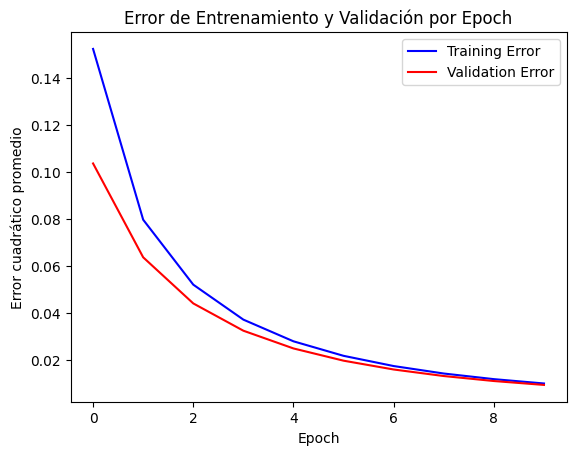

In [28]:
# Entrenar el perceptrón
perceptron_and.train(X_train, Y_train, X_validation, Y_validation)

In [29]:
# Comprobar ahora la predicción del modelo entrenado en el set de validacion
index = 4

th = 0.5
print('Input:', X_validation[index])
inputs = X_validation[index]
prob = perceptron_and.predict(inputs)
print('Probabilidad:', prob)
print('Prediction:', (prob>th).astype('int'))

Input: [0 1]
Probabilidad: [0.09154473]
Prediction: [0]


Ahora entrenado el modelo de perceptrón, es momento de evaluar su rendimiento en el conjunto de validación

In [30]:
# Evaluamos cómo funciona el modelo en el set de validación

# Suponiendo que perceptron_and ya está definido y que X_validation, Y_validation están disponibles
predictions = []
th = 0.5  # Umbral para clasificación binaria

for inputs in X_validation:
    prob = perceptron_and.predict(inputs)
    prediction = (prob > th).astype(int)
    predictions.append(prediction)

conf_matrix = confusion_matrix(Y_validation, np.array(predictions).flatten())
print("Matriz de Confusión:")
print(conf_matrix)


Matriz de Confusión:
[[745   0]
 [  0 255]]


In [31]:

# Generar datos de test
X_test, Y_test = generate_samples(500)

# Hacer predicciones sobre el conjunto de test
predictions_test = []
th = 0.5  # Umbral para clasificación binaria

for inputs in X_test:
    prob = perceptron_and.predict(inputs)
    prediction = (prob > th).astype(int)
    predictions_test.append(prediction)

# Calcular y visualizar la matriz de confusión
conf_matrix_test = confusion_matrix(Y_test, predictions_test)
print("Matriz de Confusión del Test:")
print(conf_matrix_test)


Matriz de Confusión del Test:
[[380   0]
 [  0 120]]
